In [1]:
import featurization
import pandas as pd
import geopandas
import helpers
%load_ext autoreload
%autoreload 2

In [41]:
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
geodf = featurization.all_featurization("all-sc-bike-data-1101.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
zoningdf = geopandas.read_file('Zoning')

In [5]:
zoningdf.head()

,OBJECTID,ZONING,SHAPE_LENG,SHAPEarea,SHAPElen,geometry
0,23,CC,0.005469,1.125082e+05,1772.315833,"POLYGON ((6115648.111000001 1818541.042999998,..."
1,24,PK,0.002634,4.084068e+04,881.121721,"POLYGON ((6114770.856000006 1817930.811000004,..."
2,25,RM,0.013191,5.012602e+05,4361.125116,"POLYGON ((6114341.5 1818988.125, 6114368.22599..."
3,26,CT,0.020528,1.400059e+06,6890.346622,"POLYGON ((6114905.5 1819702.375, 6115071.5 181..."
4,27,CC,0.003188,5.038172e+04,1046.563196,"POLYGON ((6115484.502000004 1817765.548999995,..."


In [10]:
geodf.crs

{'init': 'epsg:4326'}

In [13]:
zoningdf = zoningdf.to_crs(epsg=4326)

In [21]:
zoningdf.crs

{'init': 'epsg:4326', 'no_defs': True}

In [18]:
zoningdf.drop(['OBJECTID', 'SHAPE_LENG', 'SHAPEarea', 'SHAPElen'], axis = 1, inplace=True)

In [32]:
geodf_plus = geopandas.sjoin(geodf, zoningdf, how="left", op='intersects')

/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [36]:
geodf_plus.fillna(value = 'out', inplace=True)

In [37]:
geodf_plus.head()

,bike_id,lat,lon,idle_time,batt_start,batt_end,utc_time_start,utc_time_end,local_time_start,gets_pickedup_charged,gets_pickedup_not_charged,in_charger,next_action,geolocation,index_right,ZONING
58,bike_20631,36.98725,-122.03416,00:47:18,94,94,2018-10-23 19:26:39+00:00,2018-10-23 20:13:57+00:00,2018-10-23 12:26:39-07:00,False,False,False,rented,POINT (-122.03416 36.98725),36,IG
59,bike_20631,36.98733,-122.03417,00:51:33,96,96,2018-10-23 20:28:01+00:00,2018-10-23 21:19:34+00:00,2018-10-23 13:28:01-07:00,False,False,False,rented,POINT (-122.03417 36.98733),36,IG
39,bike_20631,36.97425,-122.02437,00:05:13,93,93,2018-10-23 21:37:55+00:00,2018-10-23 21:43:08+00:00,2018-10-23 14:37:55-07:00,False,False,False,rented,POINT (-122.02437 36.97425),209,CBD
14,bike_20631,36.96690,-122.04056,02:13:47,49,49,2018-10-25 01:11:07+00:00,2018-10-25 03:24:54+00:00,2018-10-24 18:11:07-07:00,False,False,False,rented,POINT (-122.04056 36.9669),187,CC
43,bike_20631,36.97576,-122.02842,00:15:05,42,42,2018-10-25 03:44:59+00:00,2018-10-25 04:00:04+00:00,2018-10-24 20:44:59-07:00,False,False,False,rented,POINT (-122.02842 36.97576),209,CBD


HTTPError: HTTP Error 404: Not Found

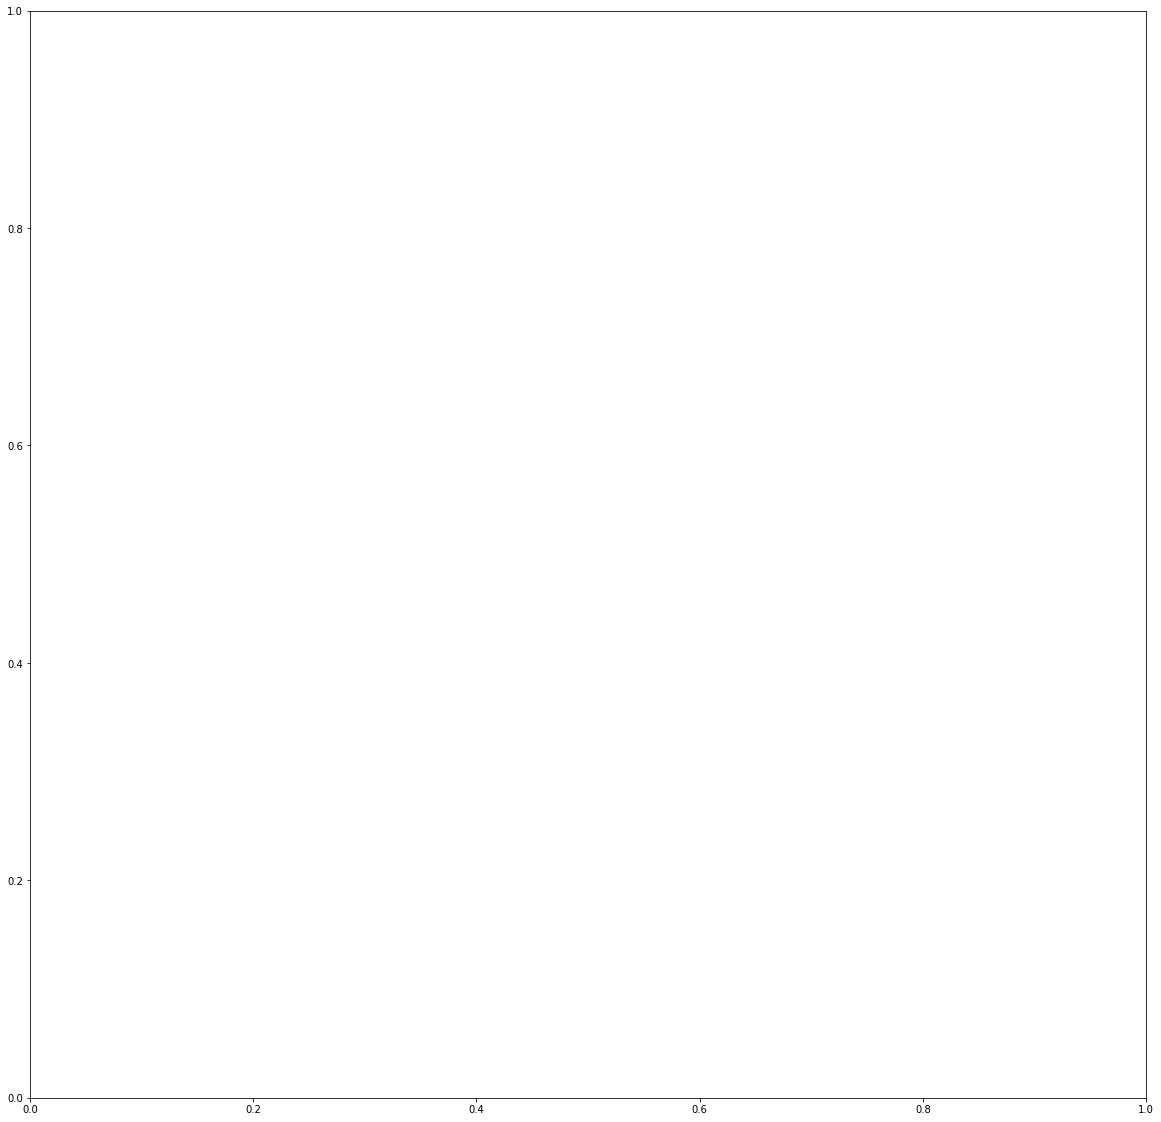

In [53]:
fig, ax = plt.subplots(1, figsize=(20, 20))
helpers.map_bikes(ax, geodf_plus, color_by='ZONING')

In [25]:
label = None

In [30]:
if label != None:
    print('True')

In [39]:
w, s, e, n = geodf.total_bounds

In [42]:
img, ext = ctx.bounds2img(w, s, e, n, 15, ll=True)

HTTPError: HTTP Error 404: Not Found

In [48]:
censusdf = geopandas.read_file('ACS_2016_5YR_BG_06_CALIFORNIA.gdb')

In [49]:
censusdf.head()

,GEOID,B00001e1,B00001m1,B00002e1,B00002m1,geometry
0,15000US060014001001,324.0,-1.0,144.0,-1.0,None
1,15000US060014002001,184.0,-1.0,78.0,-1.0,None
2,15000US060014002002,138.0,-1.0,66.0,-1.0,None
3,15000US060014003001,69.0,-1.0,29.0,-1.0,None
4,15000US060014003002,89.0,-1.0,42.0,-1.0,None


In [50]:
tractdf = geopandas.read_file('Tract_2010Census_DP1')

In [52]:
tractdf.columns

Index(['GEOID10', 'NAMELSAD10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'DP0010001', 'DP0010002', 'DP0010003', 'DP0010004',
       ...
       'DP0210001', 'DP0210002', 'DP0210003', 'DP0220001', 'DP0220002',
       'DP0230001', 'DP0230002', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object', length=195)

In [55]:
tractdf.head()

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry
0,01005950300,Census Tract 9503,352811329.0,499970.0,+31.7908933,-085.5670514,1638,98,87,88,...,673,544,129,1283,355,2.36,2.75,1.164633,0.033648,POLYGON ((-85.52743699999996 31.86650300000008...
1,01005950900,Census Tract 9509,16201446.0,8339342.0,+31.8467221,-085.1462332,4583,456,387,363,...,1784,857,927,2196,2387,2.56,2.57,0.280687,0.002338,POLYGON ((-85.16412199999996 31.83059499999996...
2,01005950800,Census Tract 9508,14630162.0,380622.0,+31.9206930,-085.1760317,2055,110,137,128,...,901,550,351,1257,798,2.29,2.27,0.173100,0.001431,"POLYGON ((-85.14871799999997 31.909335, -85.14..."
3,01005950700,Census Tract 9507,127200997.0,112809.0,+31.9440855,-085.2620842,1727,101,112,106,...,646,372,274,915,663,2.46,2.42,0.622975,0.012143,POLYGON ((-85.14578399999999 31.89149100000009...
4,01005950600,Census Tract 9506,101697268.0,1101261.0,+31.8783526,-085.2729215,2099,137,160,166,...,828,510,318,1295,804,2.54,2.53,0.556037,0.009798,POLYGON ((-85.14572299999998 31.89010600000006...


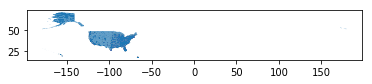

In [56]:
tractdf.plot()

In [58]:
tractdf.crs

{}

In [57]:
geodf_tract = geopandas.sjoin(geodf, tractdf, how="left", op='intersects')

/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


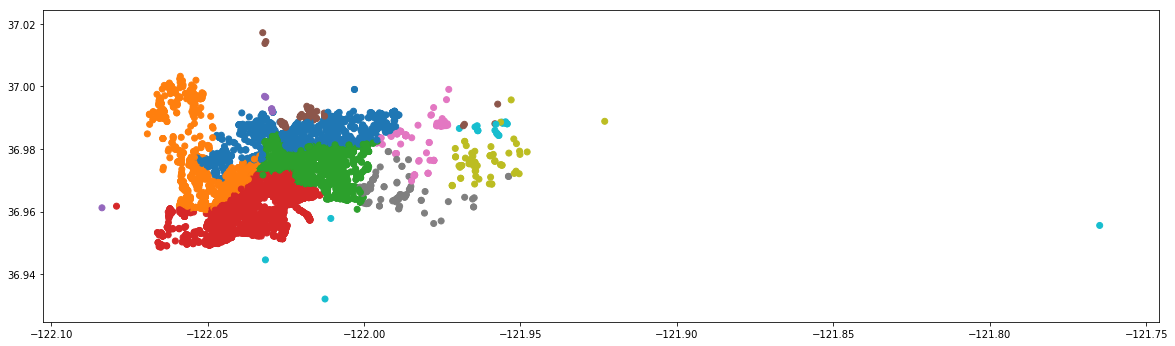

In [67]:
fig, ax = plt.subplots(1, figsize=(20, 20))
geodf_tract.plot(ax=ax, column = 'NAMELSAD10')

In [64]:
print(geodf_tract.columns)

Index(['bike_id', 'lat', 'lon', 'idle_time', 'batt_start', 'batt_end',
       'utc_time_start', 'utc_time_end', 'local_time_start',
       'gets_pickedup_charged',
       ...
       'DP0200001', 'DP0210001', 'DP0210002', 'DP0210003', 'DP0220001',
       'DP0220002', 'DP0230001', 'DP0230002', 'Shape_Leng', 'Shape_Area'],
      dtype='object', length=209)


In [68]:
blockdf = geopandas.read_file('tabblock2010_06_pophu')

In [69]:
blockdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10,geometry
0,06,001,440336,2001,060014403362001,N,1,4,"POLYGON ((-122.010627 37.582659, -122.010821 3..."
1,06,001,440336,2022,060014403362022,N,16,66,"POLYGON ((-122.01992 37.580664, -122.019717 37..."
2,06,001,440100,1000,060014401001000,N,6,12,"POLYGON ((-121.97565 37.640444, -121.97417 37...."
3,06,001,450601,1003,060014506011003,N,0,0,"POLYGON ((-121.950215 37.661304, -121.950202 3..."
4,06,001,435103,1057,060014351031057,N,5,13,"POLYGON ((-121.969345 37.643885, -121.969286 3..."


In [70]:
geodf_block = geopandas.sjoin(geodf, blockdf, how="left", op='intersects')

/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [77]:
len(geodf_block.BLOCKID10.unique())

837

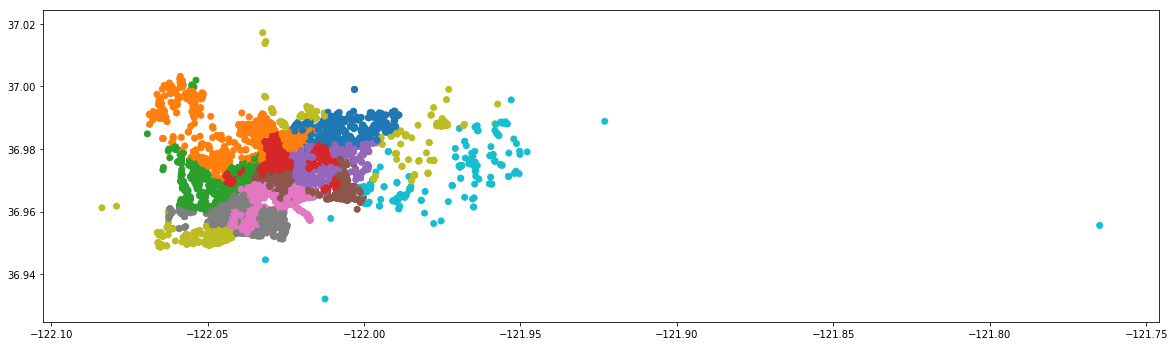

In [72]:
fig, ax = plt.subplots(1, figsize=(20, 20))
geodf_block.plot(ax=ax, column = 'BLOCKID10')